In [1]:
# Step 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Processed Data
df = pd.read_csv("../data/processed/cleaned_crypto_price.csv")  # Adjust path if needed
df.dropna(inplace=True)

# Step 3: Define Features and Target
target = "price"
X = df.drop(columns=[target, "date", "coin", "symbol"])  # Remove target and identifiers
y = df[target]

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Initialization and Training
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Step 6: Prediction
y_pred = model.predict(X_test)

# Step 7: Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"📉 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")


📉 MAE: 1730.02
📉 RMSE: 6870.40


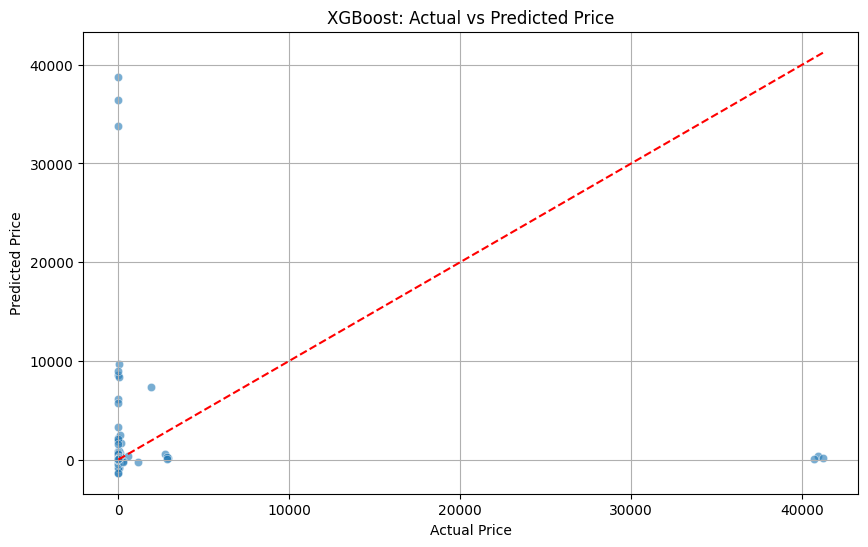

In [2]:
# Plot true vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost: Actual vs Predicted Price")
plt.grid(True)
plt.show()


Model Evelution


In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print Results
print("📊 Model Evaluation Metrics (XGBoost):")
print(f"➡️ MAE  : {mae:.2f}")
print(f"➡️ RMSE : {rmse:.2f}")
print(f"➡️ R²   : {r2:.4f}")


📊 Model Evaluation Metrics (XGBoost):
➡️ MAE  : 1730.02
➡️ RMSE : 6870.40
➡️ R²   : -0.8996


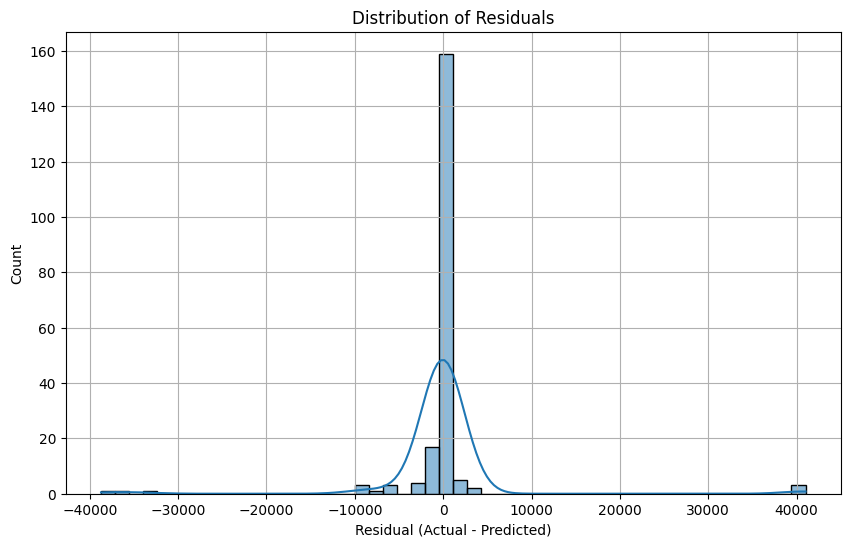

In [4]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.show()


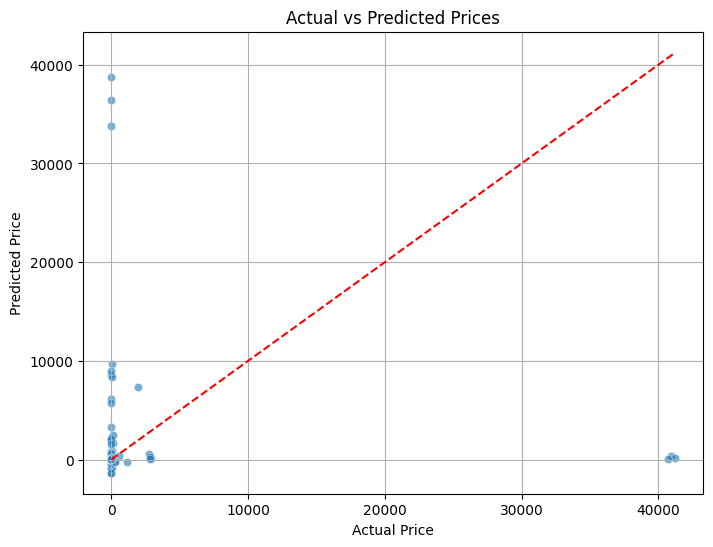

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


✅ Hyperparameter Tuning 

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define a wider and smarter hyperparameter space
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.3, 0.5],
    "min_child_weight": [1, 3, 5]
}

# XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_xgb_model = random_search.best_estimator_

# Predict
y_pred_tuned = best_xgb_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = mean_squared_error(y_test, y_pred_tuned, squared=False)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("📊 Tuned XGBoost Performance:")
print(f"➡️ MAE  : {mae_tuned:.2f}")
print(f"➡️ RMSE : {rmse_tuned:.2f}")
print(f"➡️ R²   : {r2_tuned:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
📊 Tuned XGBoost Performance:
➡️ MAE  : 1380.45
➡️ RMSE : 5071.10
➡️ R²   : -0.0349


In [11]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("\n📊 Tuned XGBoost Performance:")
print(f"➡️ MAE  : {mae:.2f}")
print(f"➡️ RMSE : {rmse:.2f}")
print(f"➡️ R²   : {r2:.4f}")



📊 Tuned XGBoost Performance:
➡️ MAE  : 1817.90
➡️ RMSE : 7190.46
➡️ R²   : -1.0808


In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define refined hyperparameter grid
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],   # L1 regularization
    'reg_lambda': [0.5, 1.0, 1.5]  # L2 regularization
}

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best model
best_xgb = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Output results
print("📊 Further Tuned XGBoost Performance:")
print(f"➡️ MAE  : {mae:.2f}")
print(f"➡️ RMSE : {rmse:.2f}")
print(f"➡️ R²   : {r2:.4f}")

# Best hyperparameters
print("✅ Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
📊 Further Tuned XGBoost Performance:
➡️ MAE  : 1211.72
➡️ RMSE : 5203.52
➡️ R²   : -0.0897
✅ Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 1.5, 'subsample': 0.7}


In [14]:
# Predict using the final tuned model
y_test_pred = best_xgb_model.predict(X_test)


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)

print("📊 Final Model Evaluation on Test Data:")
print(f"➡️ MAE  : {mae_test:.2f}")
print(f"➡️ RMSE : {rmse_test:.2f}")
print(f"➡️ R²   : {r2_test:.4f}")


📊 Final Model Evaluation on Test Data:
➡️ MAE  : 1380.45
➡️ RMSE : 5071.10
➡️ R²   : -0.0349


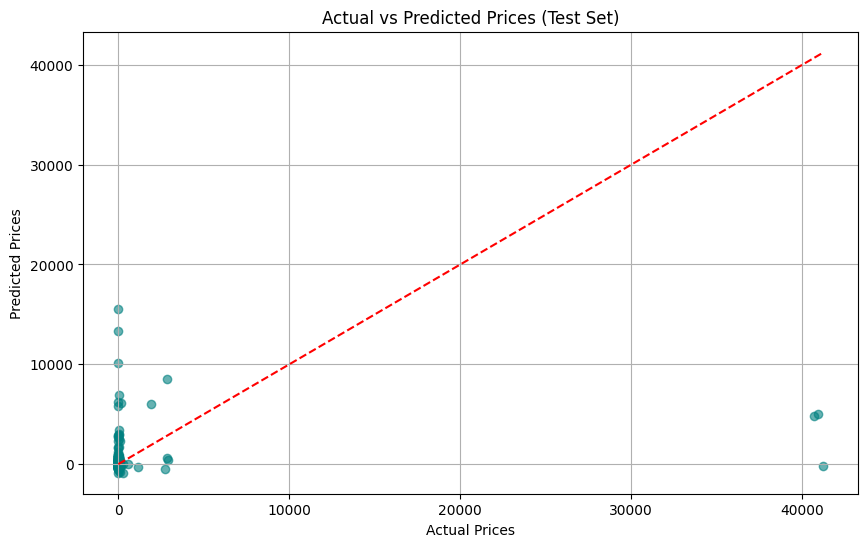

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Test Set)")
plt.grid(True)
plt.show()


In [19]:
!pip install joblib

import joblib

# Save the model to a file
joblib.dump(best_model, '../models/final_xgboost_model.pkl')


['../models/final_xgboost_model.pkl']

In [20]:
# Load the saved model
loaded_model = joblib.load('../models/final_xgboost_model.pkl')

# Use it for predictions
predictions = loaded_model.predict(X_test)


In [22]:
import joblib
import os

# Save model
os.makedirs("models", exist_ok=True)
joblib.dump(best_model, "../models/final_xgboost_model.pkl")

# Save columns used
joblib.dump(X_train.columns.tolist(), "../models/feature_columns.pkl")


['../models/feature_columns.pkl']